In [224]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [225]:
crop_production = pd.read_csv("data/district_season_crop_1997.csv")

In [226]:
crop_production.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [227]:
# Check for null values
crop_production.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [228]:
# Fill null values with mean of that state in that year
crop_production['Production'] = crop_production.groupby(['State_Name', 'Crop_Year'])['Production'].transform(lambda x: x.fillna(x.mean()))
crop_production.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

Because of data inconsistencies across various sources, we will go with 2001-2011 because we have a complete data for that period.

In [229]:
crop_production = crop_production[(crop_production['Crop_Year'] >= 2001) & (crop_production['Crop_Year'] <= 2011)]

# National Trends

In [230]:
yearwise_prod = crop_production.groupby('Crop_Year').Production.sum().reset_index()

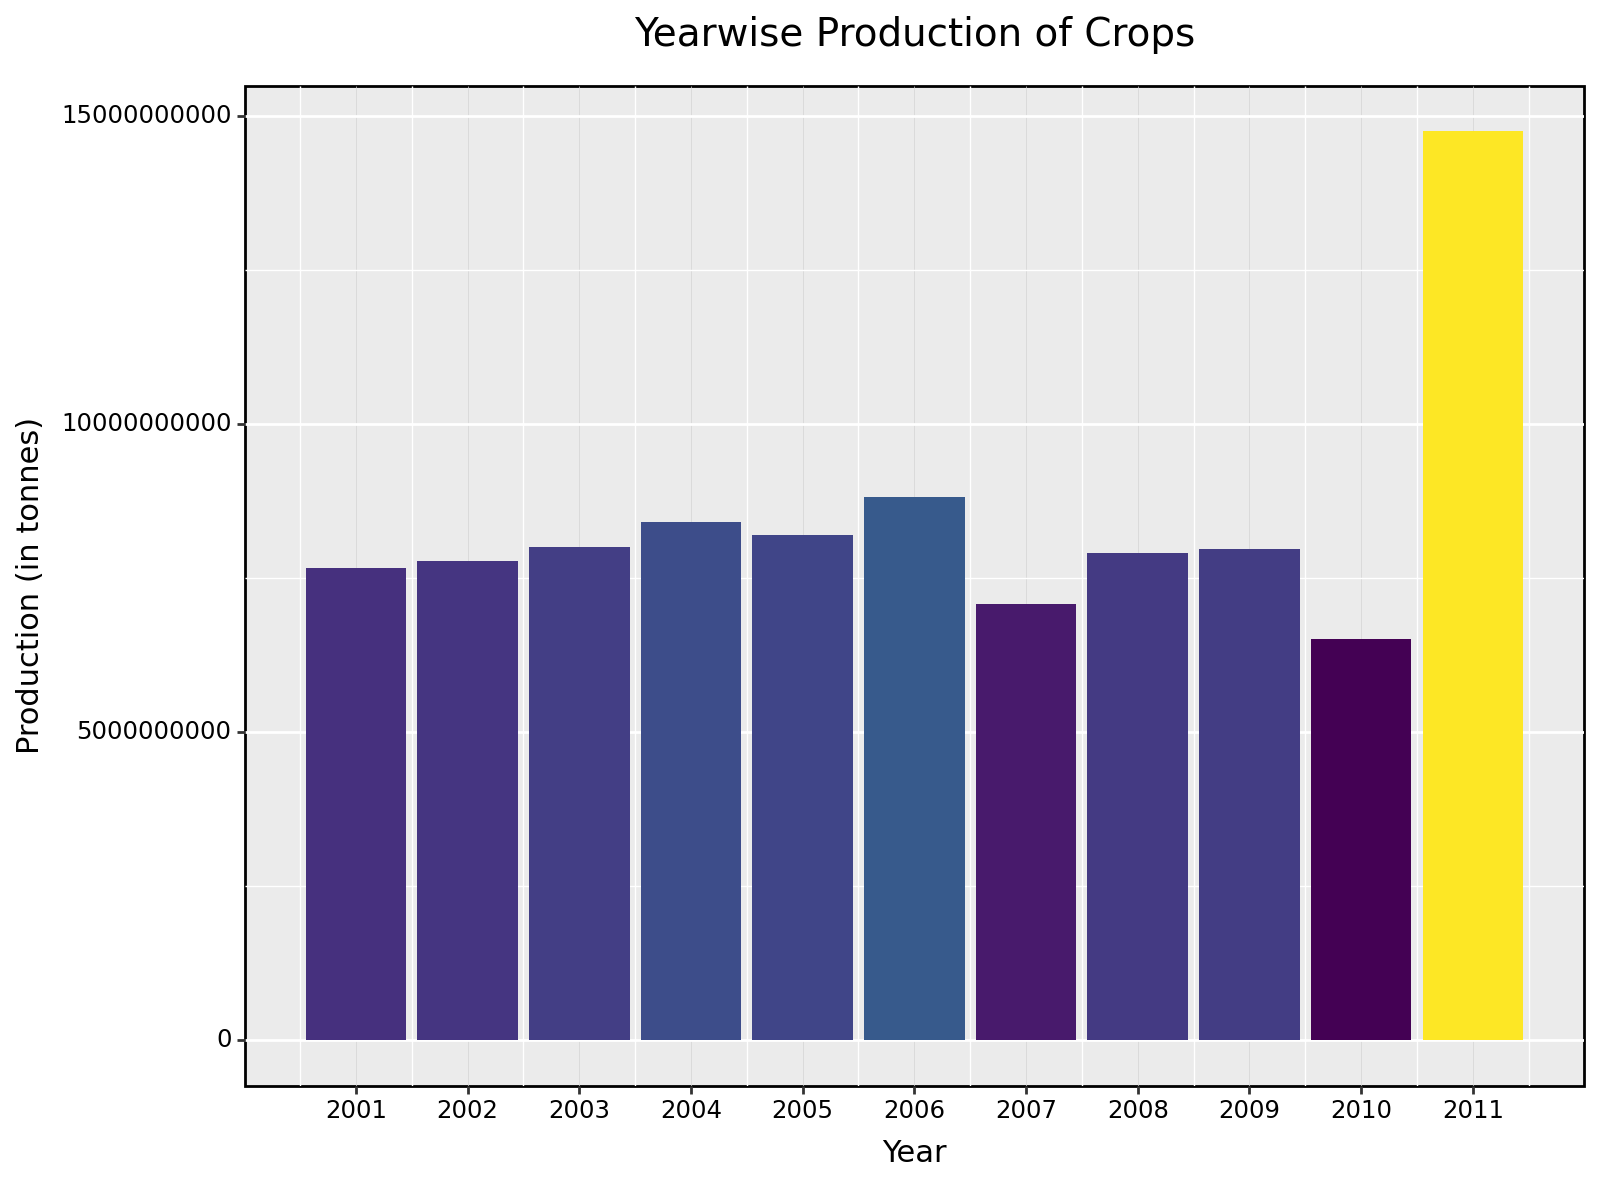

In [231]:
print(
    ggplot(yearwise_prod)
    + aes(x='Crop_Year', y='Production')
    + geom_bar(aes(fill='Production'), stat='identity')
    + labs(title='Yearwise Production of Crops', x='Year', y='Production (in tonnes)')
    + scale_x_continuous(breaks=range(yearwise_prod['Crop_Year'].min(), yearwise_prod['Crop_Year'].max() + 1))
    + theme(axis_text_x=element_text(angle=0, hjust=0.5, color='black'),
            axis_text_y=element_text(color='black'),
            panel_grid_major_x=element_line(color="lightgray", size=0.25),
            panel_border=element_rect(color="black", size=1),
            legend_position='none',
            plot_title=element_text(hjust=0.5, size=14, color='black'),
            figure_size=(8, 6))
)

In [232]:
irrigated_area = pd.read_csv("data/Crop_Irrigated_Area.csv")
irrigated_area = irrigated_area[(irrigated_area['Year'] >= 2001) & (irrigated_area['Year'] <= 2011)]
irrigated_area.head(5)

,State,District,Year,Crop,Season,Area
0,Andaman and Nicobar Islands,NICOBARS,2009,Total Condiments and Spices,Whole Year,6
1,Andaman and Nicobar Islands,NICOBARS,2009,Total Fruits and Vegetables,Whole Year,131
2,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2003,Total Fruits and Vegetables,Whole Year,24
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2004,Other Food Crops,Whole Year,2
4,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2004,Total Fruits and Vegetables,Whole Year,24


In [233]:
yearwise_area = crop_production.groupby('Crop_Year').Area.sum().reset_index()
yearwise_irrigated_area = irrigated_area.groupby('Year').Area.sum().reset_index()
area_stats = pd.merge(yearwise_area, yearwise_irrigated_area, left_on='Crop_Year', right_on='Year', how='inner')
area_stats.head(5)

,Crop_Year,Area_x,Year,Area_y
0,2001,1.652956e+08,2001,72141376
1,2002,1.577690e+08,2002,65331645
2,2003,1.720881e+08,2003,68038390
3,2004,1.678784e+08,2004,72899996
4,2005,1.631364e+08,2005,74359828


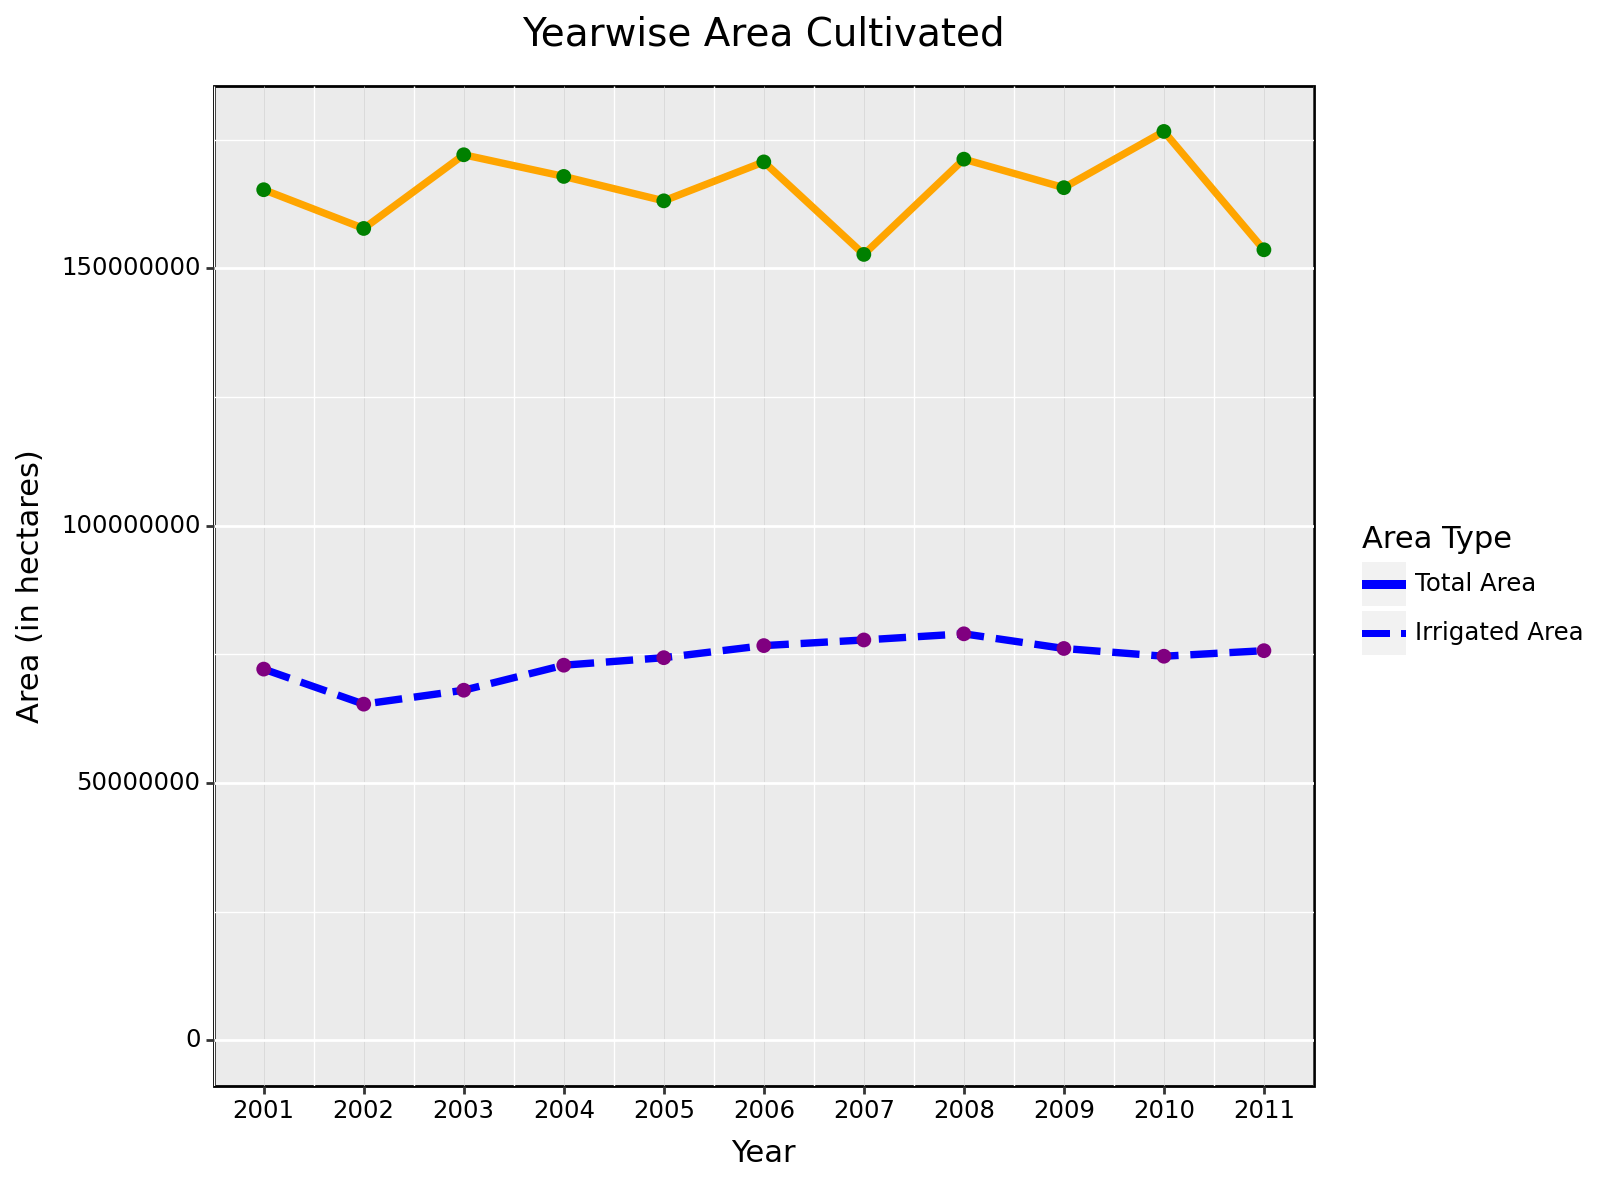

In [234]:
print(
    ggplot(area_stats)
    + geom_line(aes(x='Crop_Year', y='Area_x', linetype="'Total Area'"), color='orange', size=1.5)
    + geom_point(aes(x='Crop_Year', y='Area_x'), color='green', size=2)
    + geom_line(aes(x='Year', y='Area_y', linetype="'Irrigated Area'"), color='blue', size=1.5)
    + geom_point(aes(x='Year', y='Area_y'), color='purple', size=2)
    + labs(title='Yearwise Area Cultivated', x='Year', y='Area (in hectares)', linetype='Area Type')
    + scale_x_continuous(breaks=range(yearwise_area['Crop_Year'].min(), yearwise_area['Crop_Year'].max() + 1))
    + scale_y_continuous(limits=[0, yearwise_area['Area'].max()])
    + theme(axis_text_x=element_text(angle=0, hjust=0.5, color='black'),
            axis_text_y=element_text(color='black'),
            panel_grid_major_x=element_line(color="lightgray", size=0.25),
            panel_border=element_rect(color="black", size=1),
            legend_position='right',
            plot_title=element_text(hjust=0.5, size=14, color='black'),
            figure_size=(8, 6))
)

In [235]:
rainfall = pd.read_csv("data/rainfall_data.csv")
rainfall = rainfall[(rainfall['YEAR'] >= 2001) & (rainfall['YEAR'] <= 2011)]
rainfall.head(5)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
100,2001,7.3,8.8,18.8,43.7,67.2,219.1,279.7,209.4,114.2,107.5,22.5,7.1,1105.2,16.1,129.7,822.4,137.1
101,2002,15.7,20.3,21.5,38.3,63.3,180.1,146.2,262.5,151.2,59.5,18.2,5.1,981.9,36.0,123.1,740.1,82.8
102,2003,7.6,45.6,33.3,35.4,39.1,184.5,316.7,255.3,191.4,100.6,15.5,18.6,1243.6,53.2,107.8,947.9,134.8
103,2004,25.7,8.8,11.4,59.0,88.9,158.7,242.1,248.7,124.6,92.2,15.8,4.6,1080.5,34.5,159.2,774.1,112.6
104,2005,28.1,41.8,42.5,37.7,46.1,143.2,334.1,190.1,206.9,99.3,27.2,11.2,1208.3,69.9,126.3,874.4,137.7


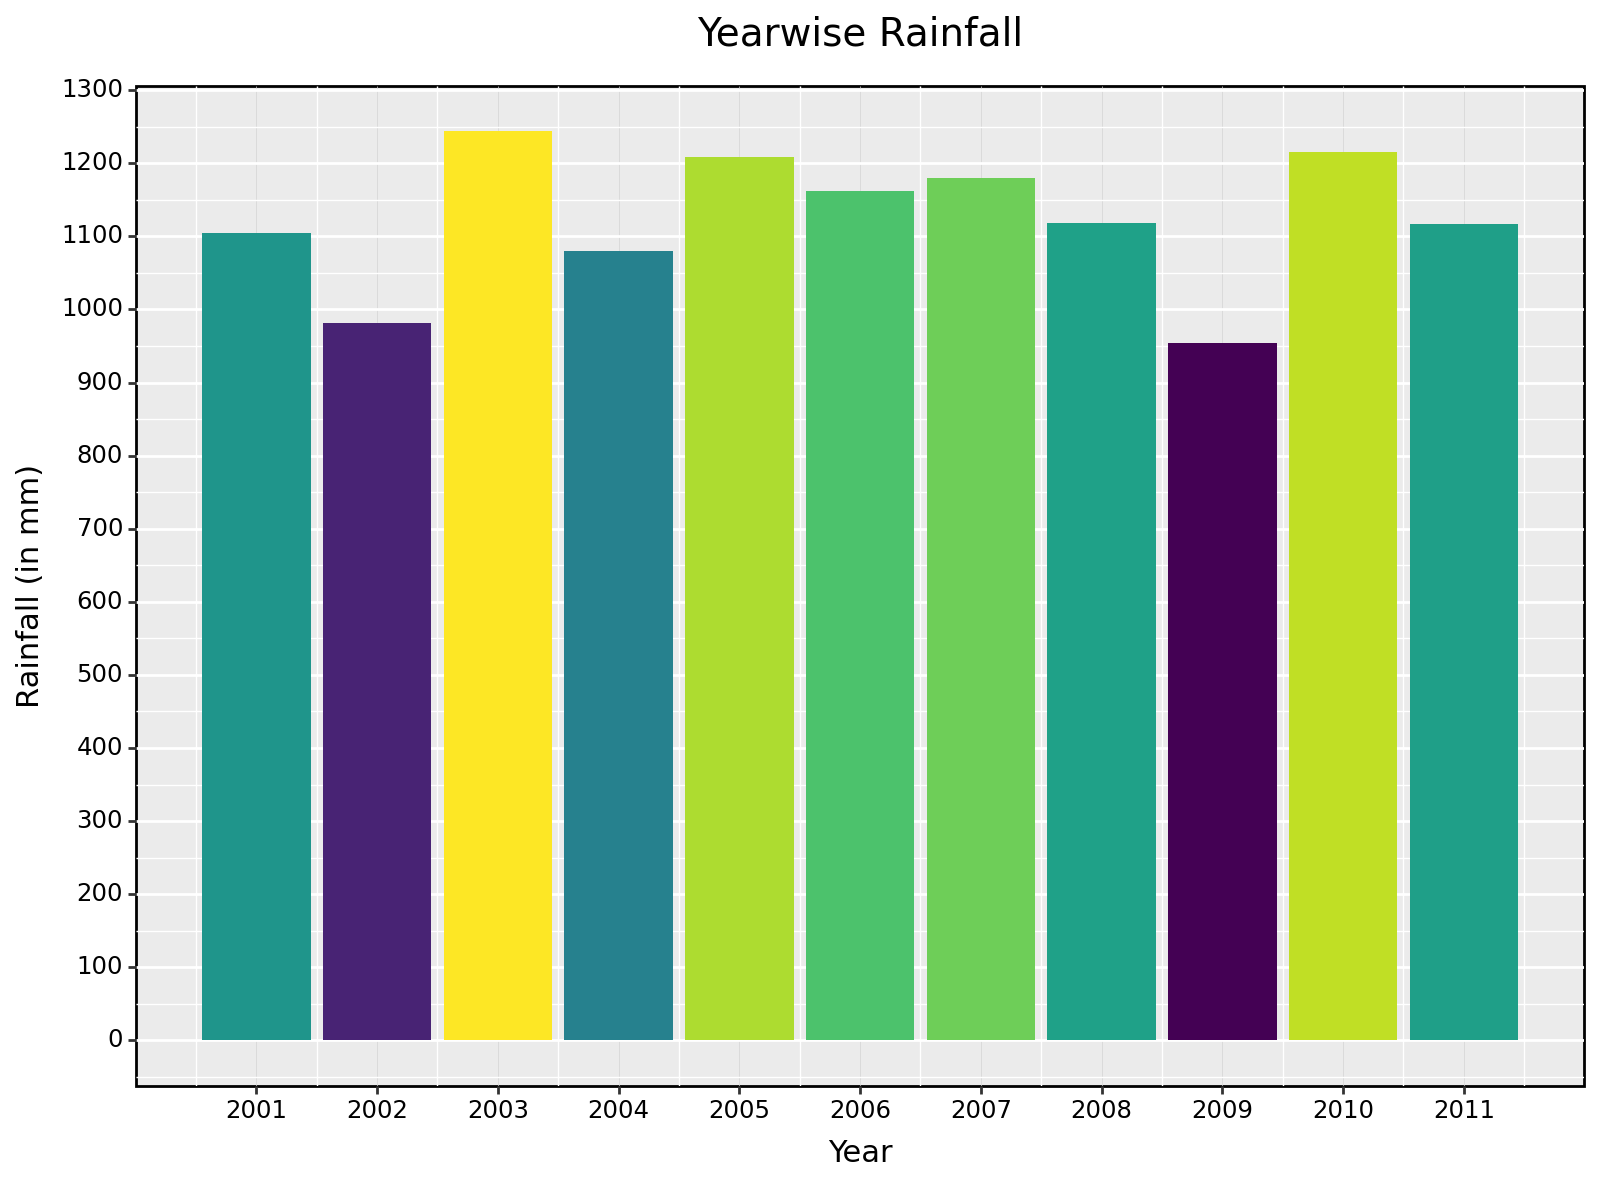

In [236]:
print(
    ggplot(rainfall)
    + aes(x='YEAR', y='ANN')
    + geom_bar(aes(fill='ANN'), stat='identity')
    + labs(title='Yearwise Rainfall', x='Year', y='Rainfall (in mm)')
    + scale_x_continuous(breaks=range(rainfall['YEAR'].min(), rainfall['YEAR'].max() + 1))
    # + scale_y_continuous(limits=[0, rainfall['ANN'].max()])
    + scale_y_continuous(breaks=range(0, int(rainfall['ANN'].max()) * 2, 100))
    + theme(axis_text_x=element_text(angle=0, hjust=0.5, color='black'),
            axis_text_y=element_text(color='black'),
            panel_grid_major_x=element_line(color="lightgray", size=0.25),
            panel_border=element_rect(color="black", size=1),
            legend_position='none',
            plot_title=element_text(hjust=0.5, size=14, color='black'),
            figure_size=(8, 6))
)

In [237]:
subsidy = pd.read_csv('data/fertilizer_subsidy.csv')
subsidy.head(5)

,Year,Product,Subsidy (In Rs.Crores)
0,2002-2003,Indigenous Urea,7790.00
1,2002-2003,Imported Urea,1.16
2,2002-2003,Indigenous P&K,2487.94
3,2002-2003,Imported P&K,736.58
4,2003-2004,Indigenous Urea,8521.00


In [238]:
total_subsidy = subsidy.groupby('Year')['Subsidy  (In Rs.Crores)'].sum().reset_index().head(10)
total_subsidy

,Year,Subsidy (In Rs.Crores)
0,2002-2003,11015.68
1,2003-2004,11847.82
2,2004-2005,16127.70
3,2005-2006,19389.64
4,2006-2007,28019.55
5,2007-2008,43319.16
6,2008-2009,99494.71
7,2009-2010,64032.29
8,2010-2011,65836.68
9,2011-2012,74569.87


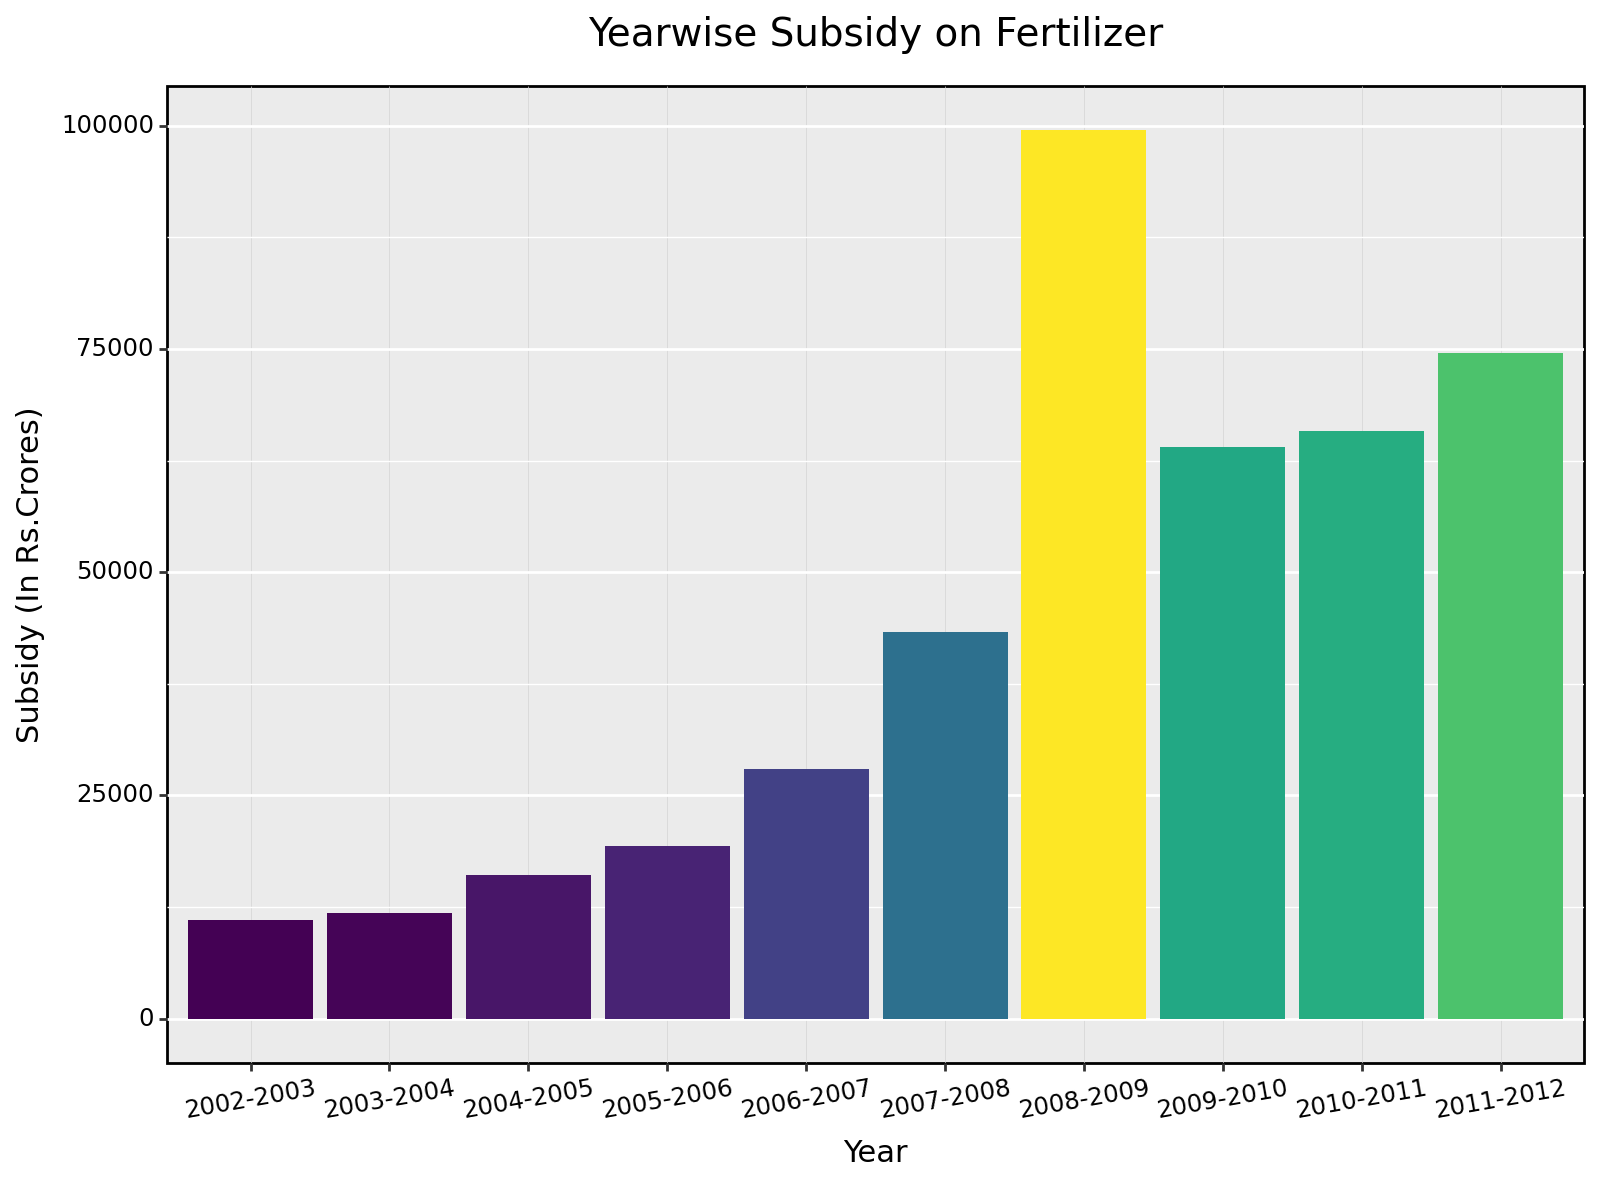

In [239]:
print(
    ggplot(total_subsidy)
    + aes(x='factor(Year)', y='Subsidy  (In Rs.Crores)')
    + geom_bar(aes(fill='Subsidy  (In Rs.Crores)'), stat='identity')
    + labs(title='Yearwise Subsidy on Fertilizer', x='Year', y='Subsidy (In Rs.Crores)')
    # + scale_x_continuous(breaks=range(yearwise_prod['Crop_Year'].min(), yearwise_prod['Crop_Year'].max() + 1))
    + theme(axis_text_x=element_text(angle=10, hjust=0.5, color='black'),
            axis_text_y=element_text(color='black'),
            panel_grid_major_x=element_line(color="lightgray", size=0.25),
            panel_border=element_rect(color="black", size=1),
            legend_position='none',
            plot_title=element_text(hjust=0.5, size=14, color='black'),
            figure_size=(8, 6))
)

In [240]:
corr_data = pd.DataFrame()
corr_data['Fertilizer Subsidy'] = total_subsidy['Subsidy  (In Rs.Crores)']
corr_data['Production'] = yearwise_prod['Production']
corr_data['Area'] = yearwise_area['Area']
corr_data['Rainfall'] = rainfall['ANN'].reset_index(drop=True)

corr_data.head(5)

,Fertilizer Subsidy,Production,Area,Rainfall
0,11015.68,7.662163e+09,1.652956e+08,1105.2
1,11847.82,7.786010e+09,1.577690e+08,981.9
2,16127.70,8.005902e+09,1.720881e+08,1243.6
3,19389.64,8.414158e+09,1.678784e+08,1080.5
4,28019.55,8.194892e+09,1.631364e+08,1208.3


In [241]:
corr_matrix = corr_data.corr()

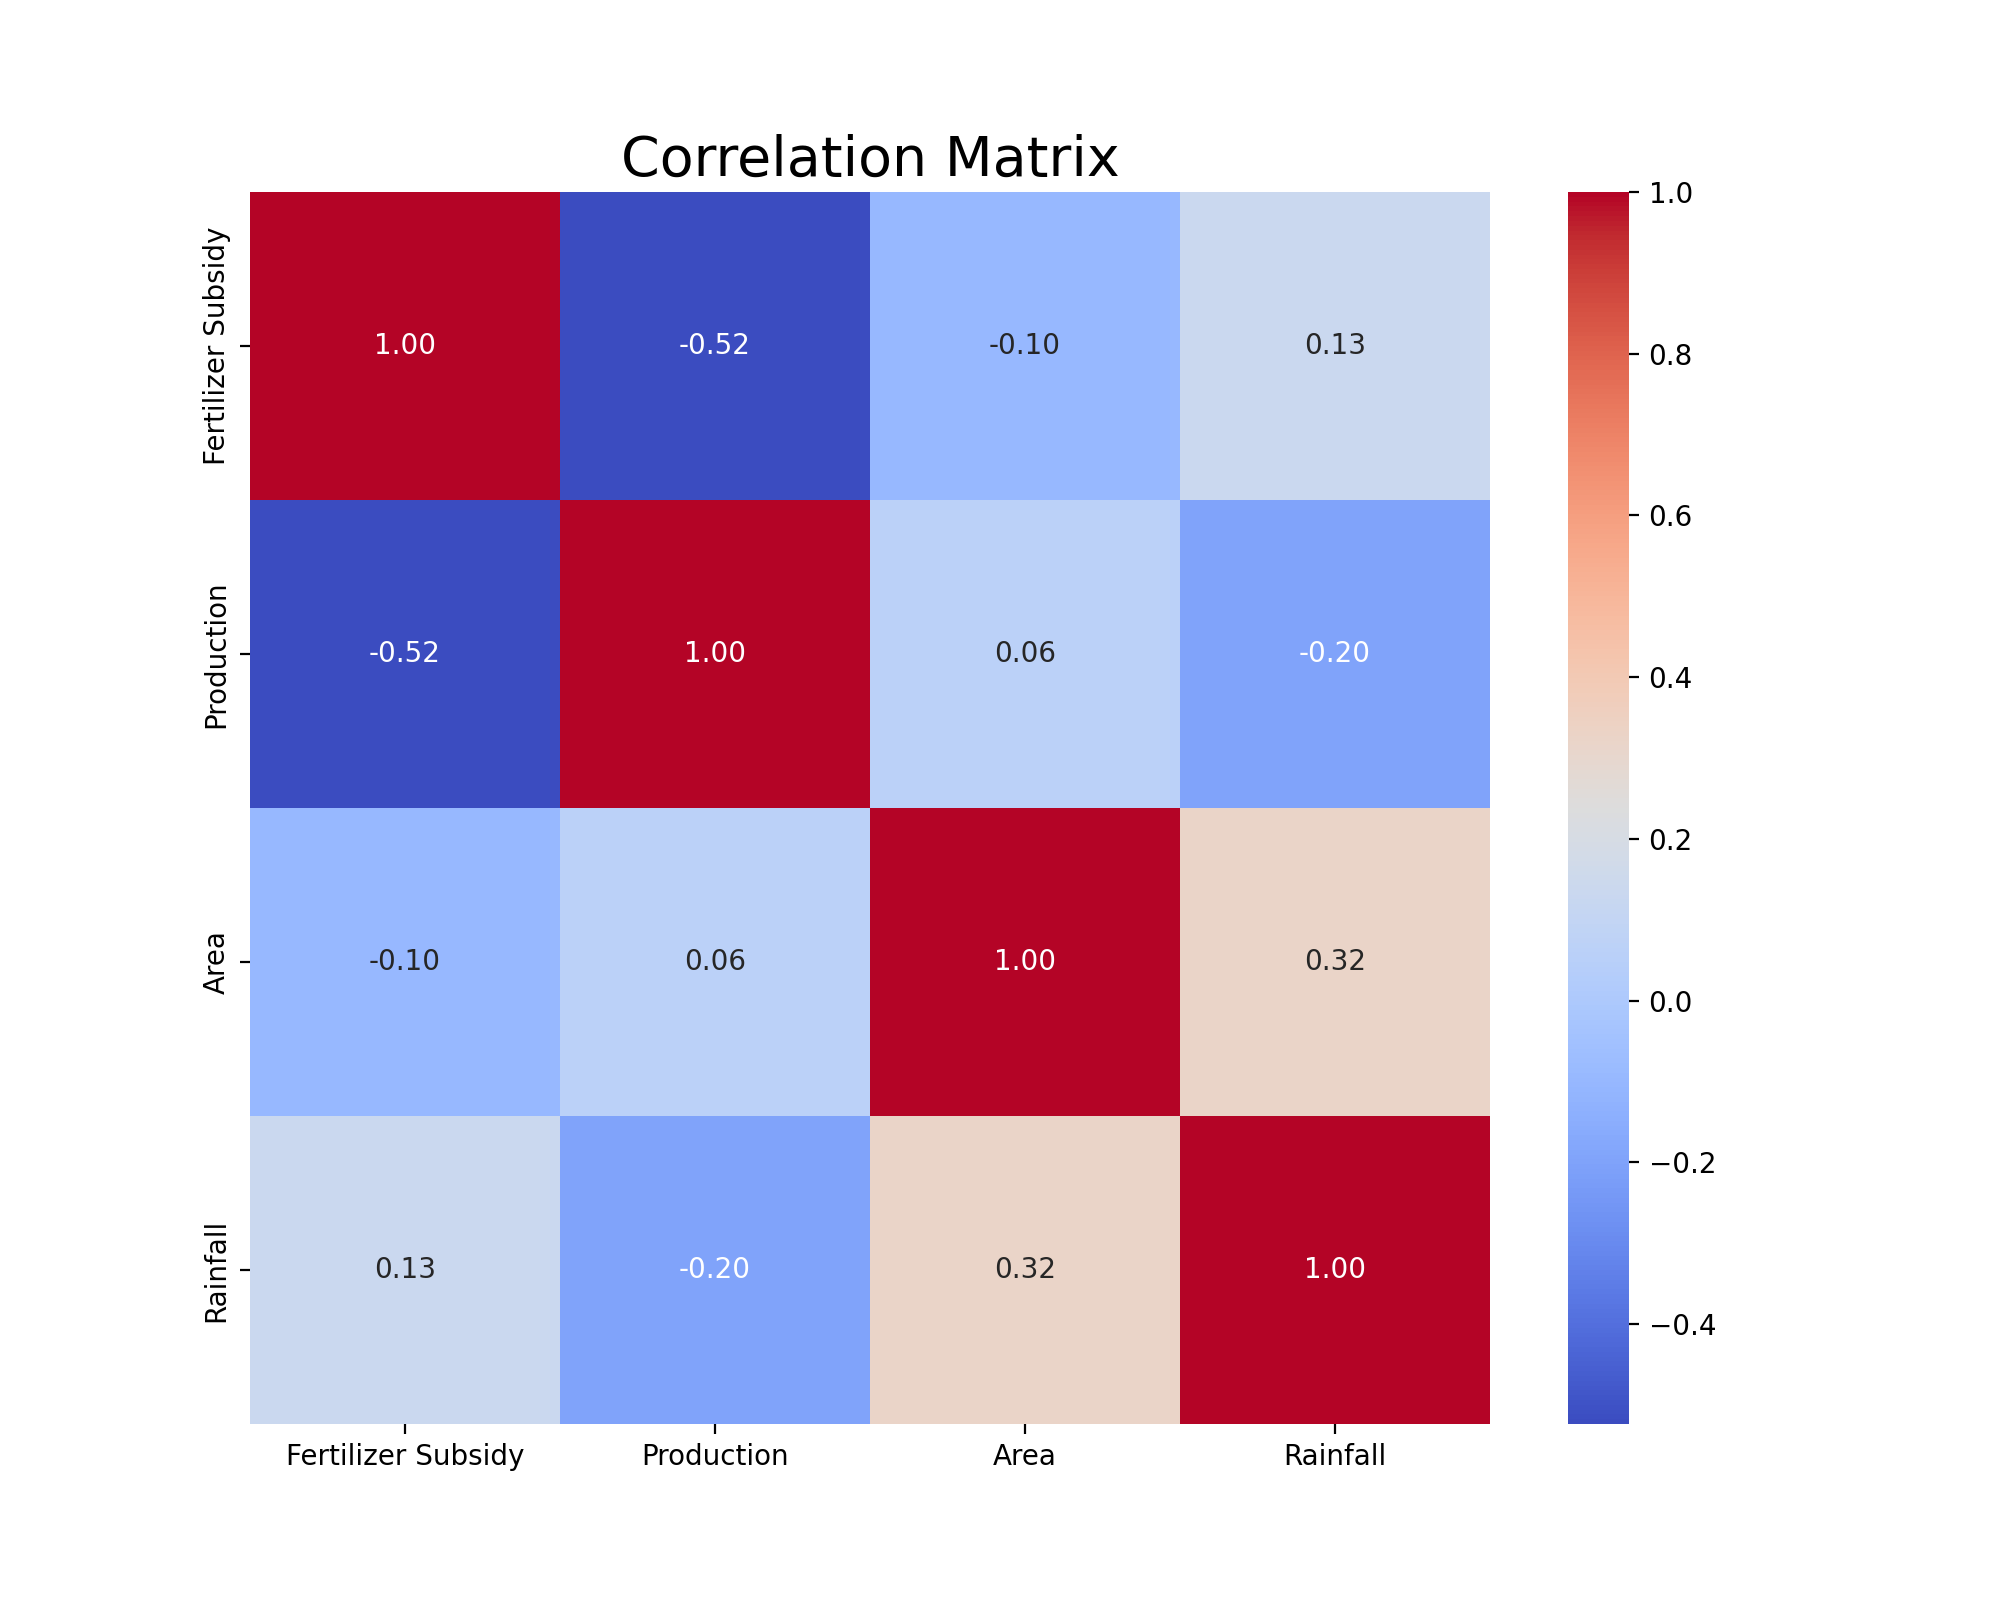

In [242]:
# Using seaborn to plot the correlation matrix because plotnine requires multiple packages and data transformations to plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

# Zonal Trends

In [243]:
#Manually assigning zones to states
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [244]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

In [245]:
crop_production['Zones'] = crop_production.apply(get_zonal_names, axis=1)
crop_production["Zones"].value_counts()

Zones
South Zone      35221
North Zone      32877
East Zone       27072
Central Zone    23586
West Zone       23441
NE Zone         17779
Union Terr        915
Name: count, dtype: int64

In [246]:
zonal_prod = crop_production[(crop_production['Crop_Year'] == 2001) | (crop_production['Crop_Year'] == 2011)]
zonal_prod = zonal_prod.groupby(['Zones', 'Crop_Year'])['Production'].sum().reset_index()
zonal_prod = zonal_prod.sort_values(by=['Crop_Year', 'Production'], ascending=[True, False]).reset_index(drop=True)

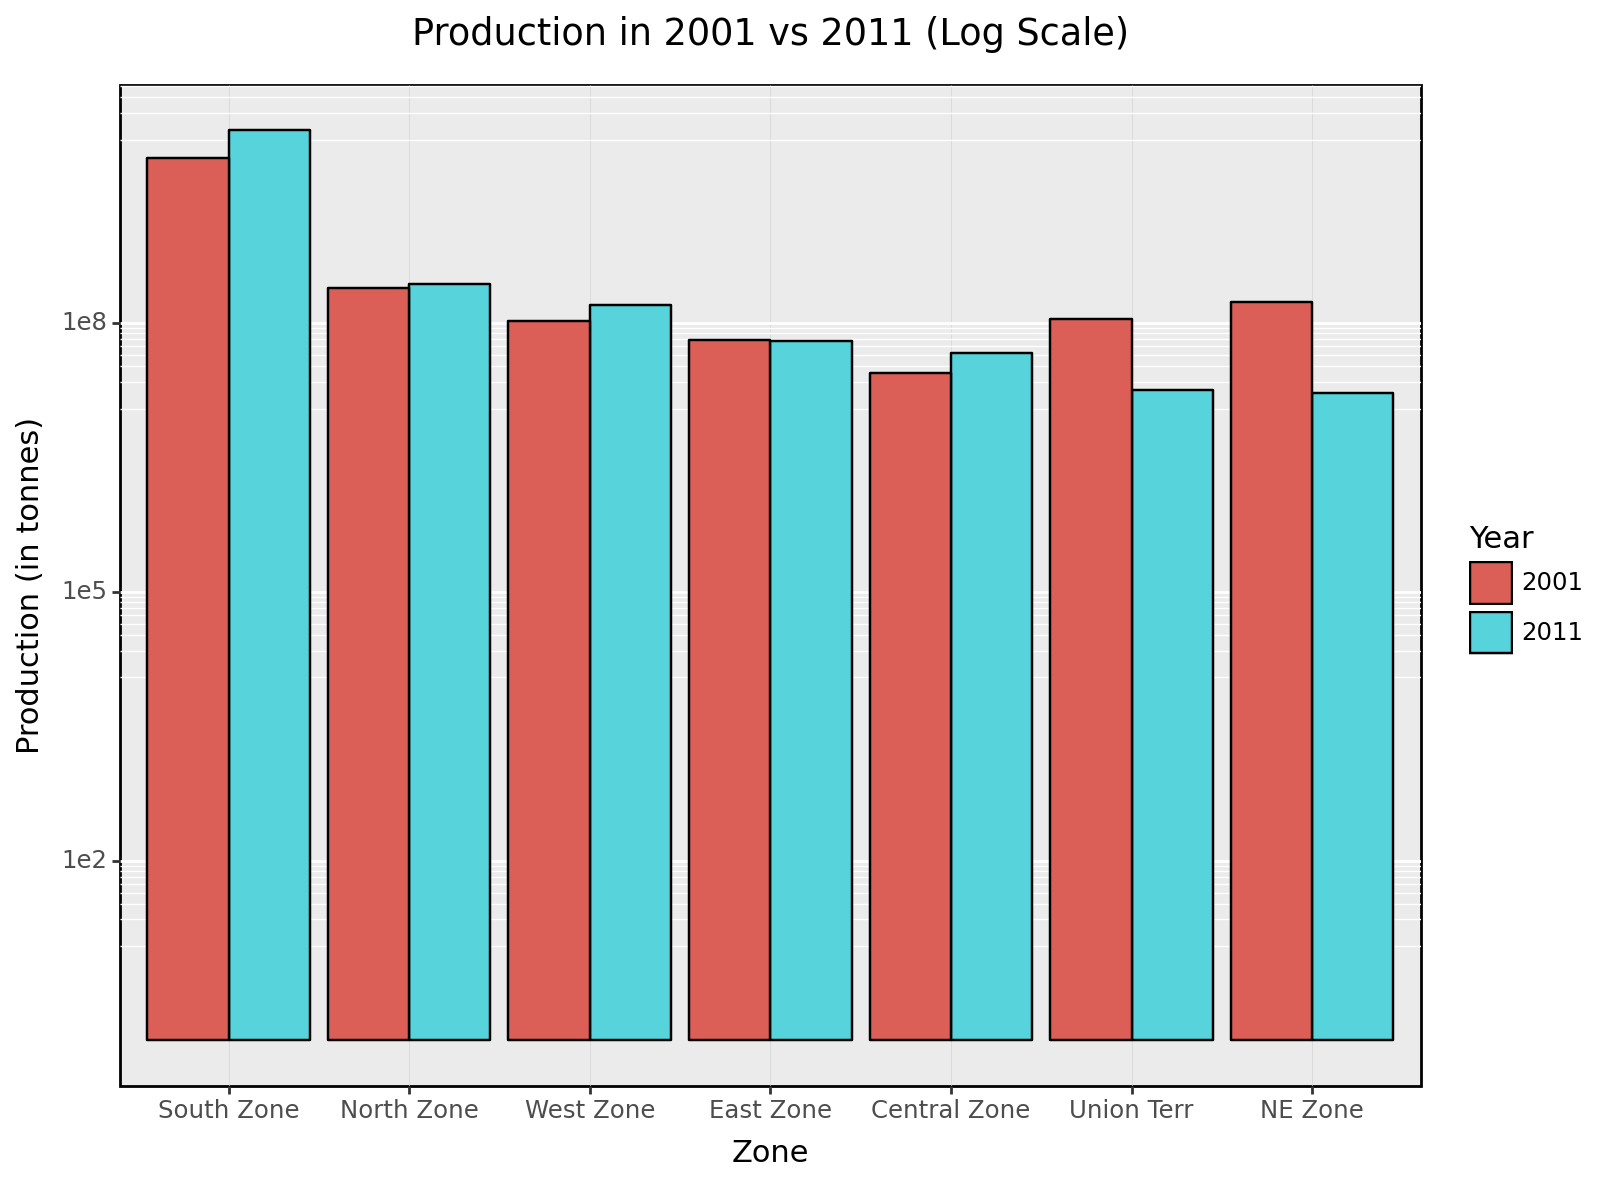

In [247]:
print(
    ggplot(zonal_prod)
    + aes(x='Zones', y='Production', fill='factor(Crop_Year)')
    + geom_bar(stat='identity', position='dodge', color='black', size=0.5)
    + labs(title='Production in 2001 vs 2011 (Log Scale)', x='Zone', y='Production (in tonnes)', fill='Year')
    + theme(axis_text_x=element_text(angle=0, hjust=0.5),
            panel_grid_major_x=element_line(color="lightgray", size=0.25),
            panel_border=element_rect(color="black", size=1),
            legend_position='right',
            plot_title=element_text(hjust=0.5),
            figure_size=(8, 6))
    + scale_x_discrete(limits=zonal_prod['Zones'].tail(7).tolist())
    + scale_y_log10()
)

In [248]:
zonal_area = crop_production[(crop_production['Crop_Year'] == 2001) | (crop_production['Crop_Year'] == 2011)]
zonal_area = zonal_area.groupby(['Zones', 'Crop_Year'])['Area'].sum().reset_index()
zonal_area = zonal_area.sort_values(by=['Crop_Year', 'Area'], ascending=[True, False]).reset_index(drop=True)
zonal_area

,Zones,Crop_Year,Area
0,West Zone,2001,46572949.00
1,North Zone,2001,39153179.00
2,South Zone,2001,29384483.00
3,Central Zone,2001,23667108.00
4,East Zone,2001,21414618.00
5,NE Zone,2001,4999980.67
6,Union Terr,2001,103287.00
7,North Zone,2011,38341068.00
8,West Zone,2011,31330345.00
9,South Zone,2011,29944806.88


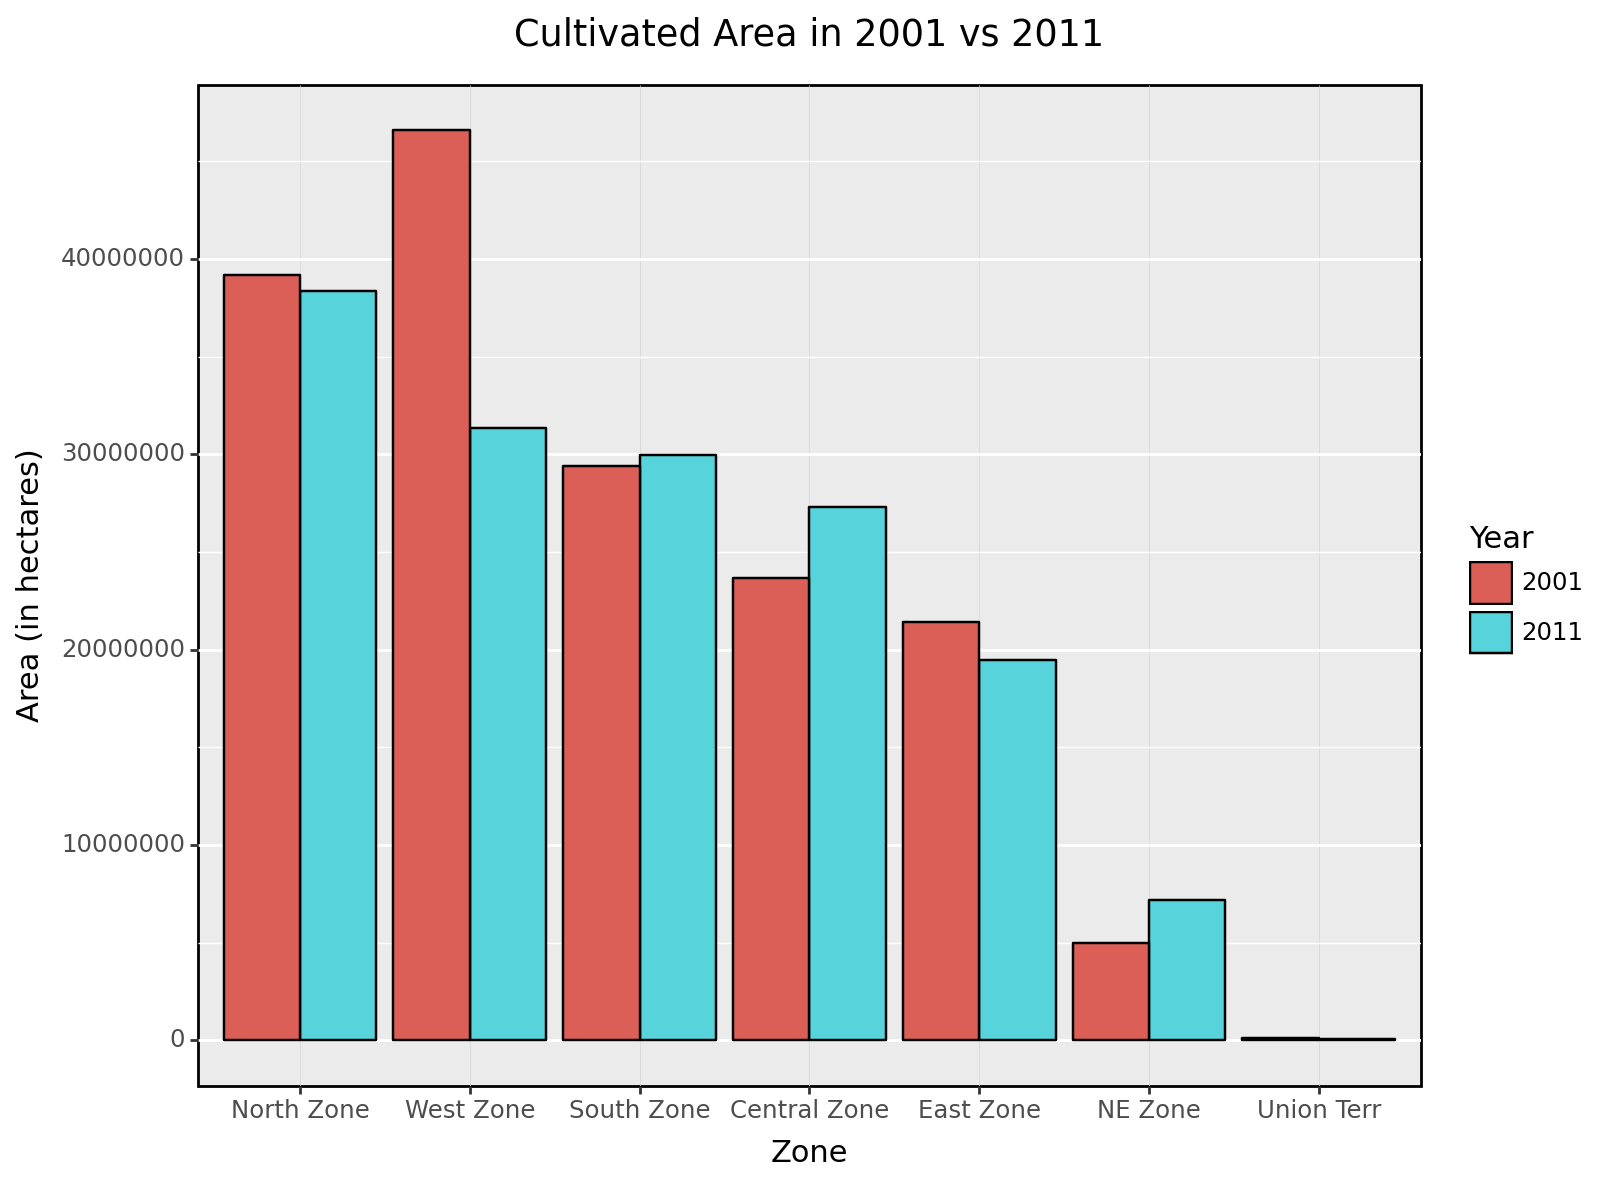

In [249]:
print(
    ggplot(zonal_area)
    + aes(x='Zones', y='Area', fill='factor(Crop_Year)')
    + geom_bar(stat='identity', position='dodge', color='black', size=0.5)
    + labs(title='Cultivated Area in 2001 vs 2011', x='Zone', y='Area (in hectares)', fill='Year')
    + theme(axis_text_x=element_text(angle=0, hjust=0.5),
            panel_grid_major_x=element_line(color="lightgray", size=0.25),
            panel_border=element_rect(color="black", size=1),
            legend_position='right',
            plot_title=element_text(hjust=0.5),
            figure_size=(8, 6))
    + scale_x_discrete(limits=zonal_area['Zones'].tail(7).tolist())
)

# Crop-Wise Trends

In [250]:
# Manually segregating crops into categories
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

In [251]:
crop_production['cat_crop']=crop_production['Crop'].apply(cat_crop)
crop_production["cat_crop"].value_counts()

cat_crop
Cereal        40502
Pulses        26950
oilseeds      22474
Vegetables    16136
spices        14682
Nuts           7442
Commercial     6882
fibres         6552
Beans          6163
Fruits         4730
Name: count, dtype: int64

In [252]:
crop_types=pd.DataFrame(crop_production["cat_crop"].value_counts()).reset_index()
crop_types

,cat_crop,count
0,Cereal,40502
1,Pulses,26950
2,oilseeds,22474
3,Vegetables,16136
4,spices,14682
5,Nuts,7442
6,Commercial,6882
7,fibres,6552
8,Beans,6163
9,Fruits,4730


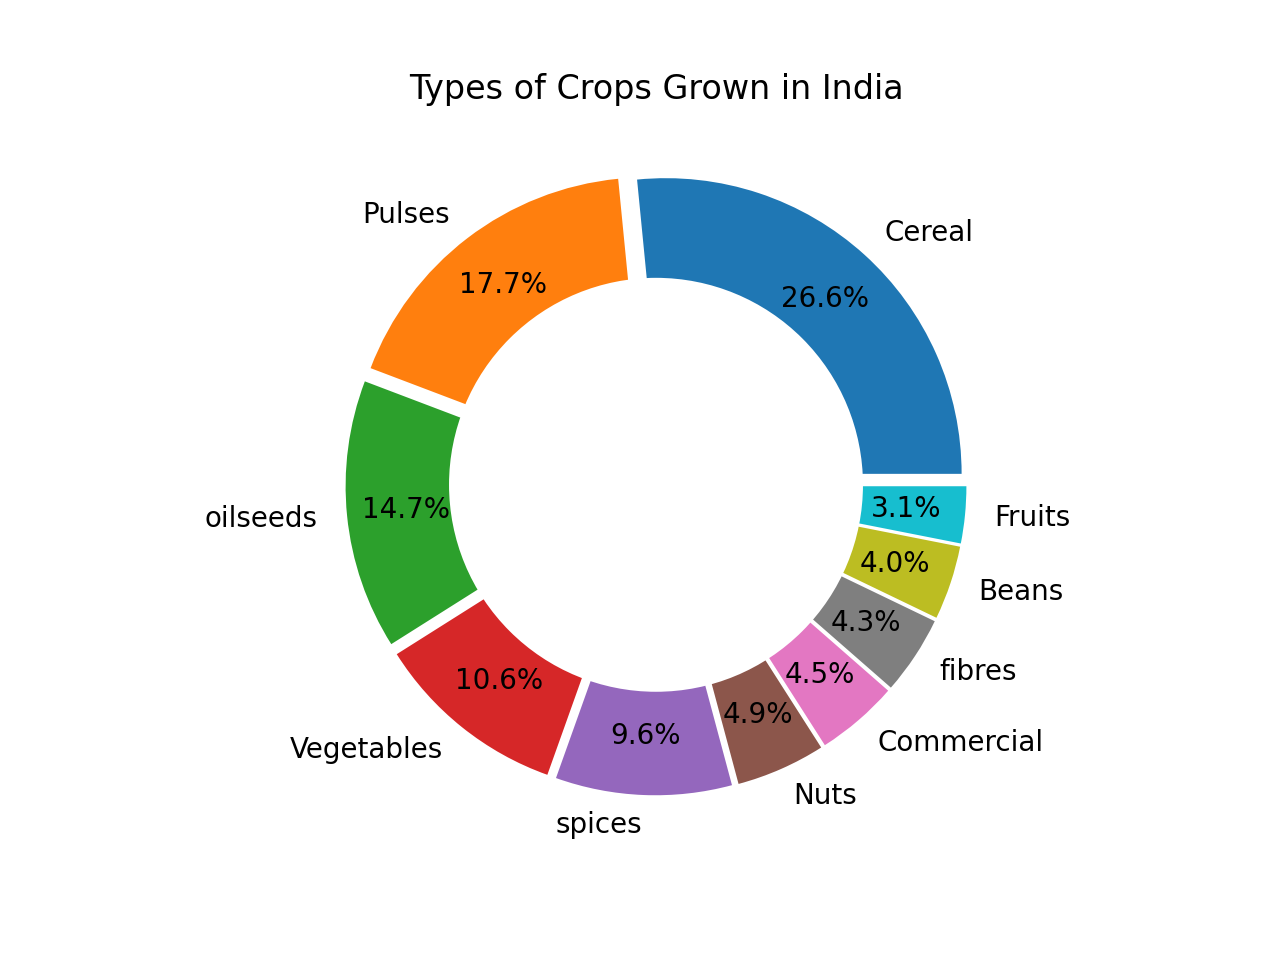

In [253]:
# Using matplotlib because plotnine does not support pie chart
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(crop_types['count'], labels=crop_types['cat_crop'], autopct='%1.1f%%', pctdistance=0.8, explode=explode)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Types of Crops Grown in India') 
plt.show()

In [254]:
crop_type_prod = crop_production[(crop_production['Crop_Year'] == 2001) | (crop_production['Crop_Year'] == 2011)]
crop_type_prod['Production'] = crop_type_prod['Production'] + 1

In [255]:
crop_type_prod.dropna(inplace=True)

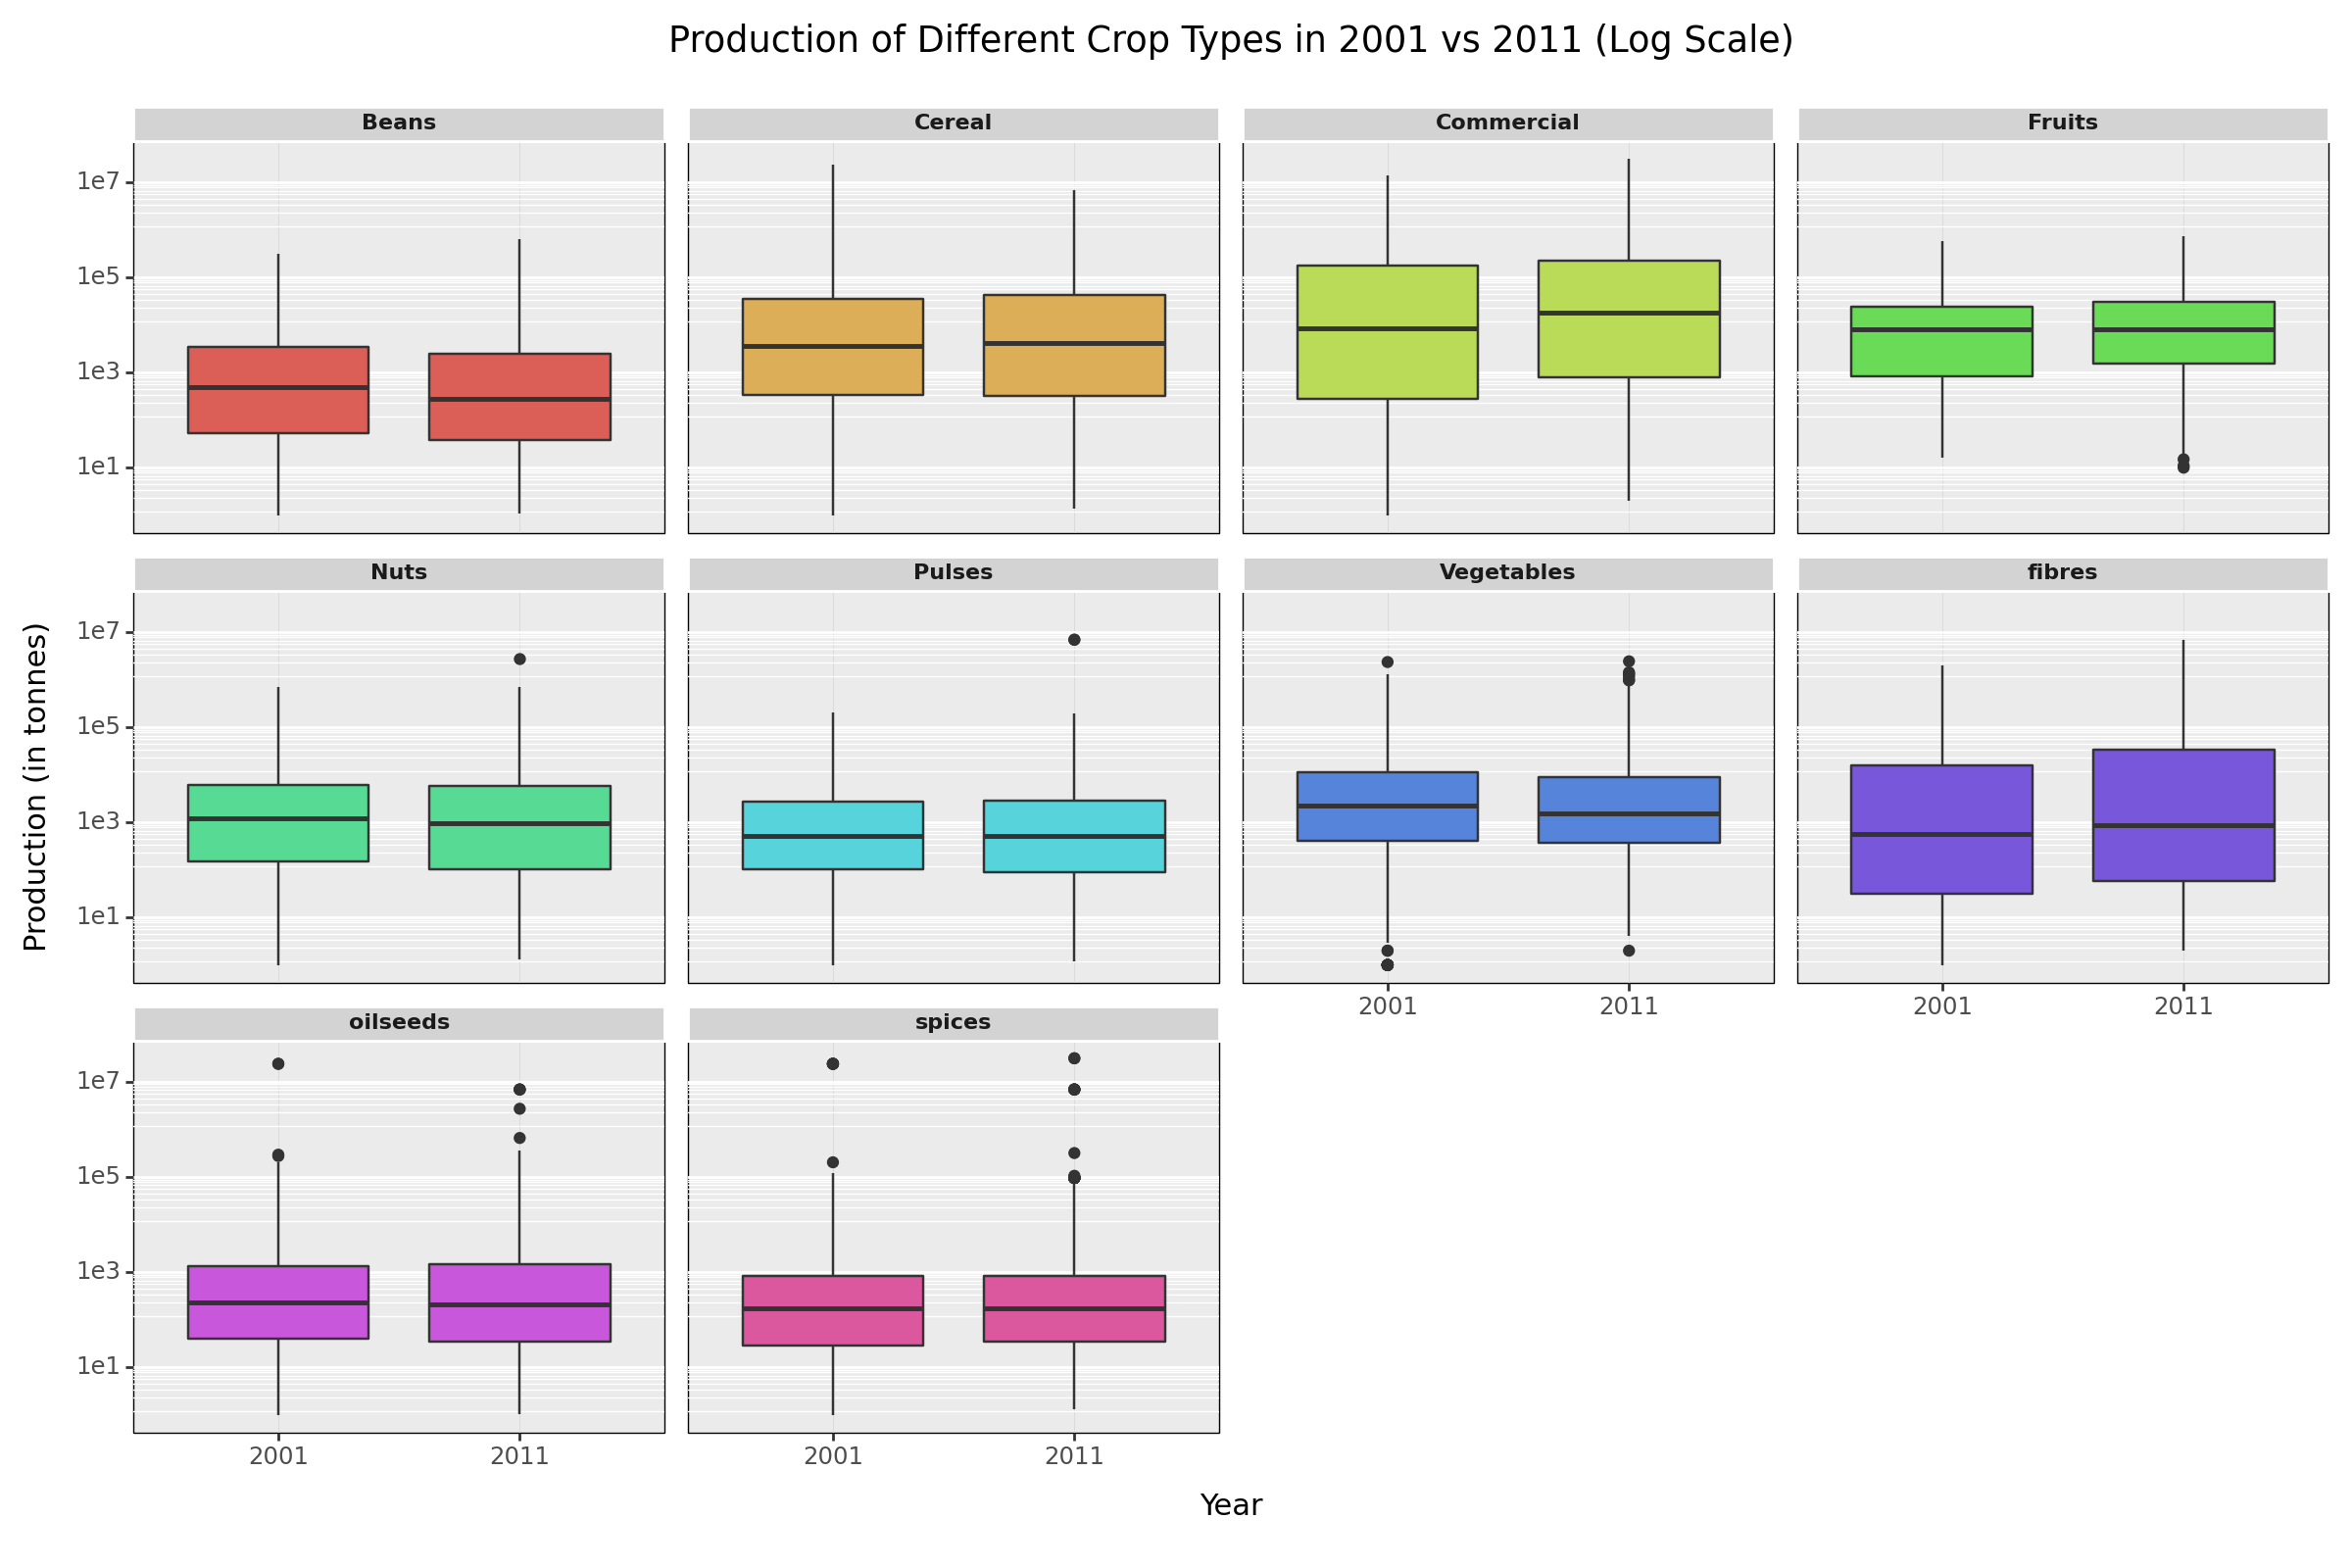

In [256]:
print(
    ggplot(crop_type_prod, aes(x='factor(Crop_Year)', y='Production', fill='factor(cat_crop)'))
    + geom_boxplot()
    + facet_wrap('~cat_crop')
    + labs(title='Production of Different Crop Types in 2001 vs 2011 (Log Scale)', x='Year', y='Production (in tonnes)', fill='cat_crop')
    + theme(axis_text_x=element_text(angle=0, hjust=0.5),
                 panel_grid_major_x=element_line(color="lightgray", size=0.25),
                 panel_border=element_rect(color="black", size=0.5),
                 strip_background=element_rect(fill='lightgray', color='white'),
                 strip_text=element_text(size=8, weight='bold'),
                 plot_title=element_text(hjust=0.5),
                 legend_position='none',
                 figure_size=(12, 8))
    + scale_y_log10()
)

In [257]:
top_crops = crop_production[crop_production['Crop_Year'] == 2011]
top_crops = top_crops.groupby(['Crop'])['Production'].sum().reset_index()
top_crops = top_crops.sort_values(by='Production', ascending=False).reset_index(drop=True)
top_crops

,Crop,Production
0,Coconut,1.359427e+10
1,Sugarcane,5.661455e+08
2,Wheat,1.334307e+08
3,Rice,1.021899e+08
4,Cardamom,7.679182e+07
...,...,...
57,Guar seed,1.194240e+05
58,Oilseeds total,3.300000e+04
59,Brinjal,6.940000e+02
60,Blackgram,4.500000e+02


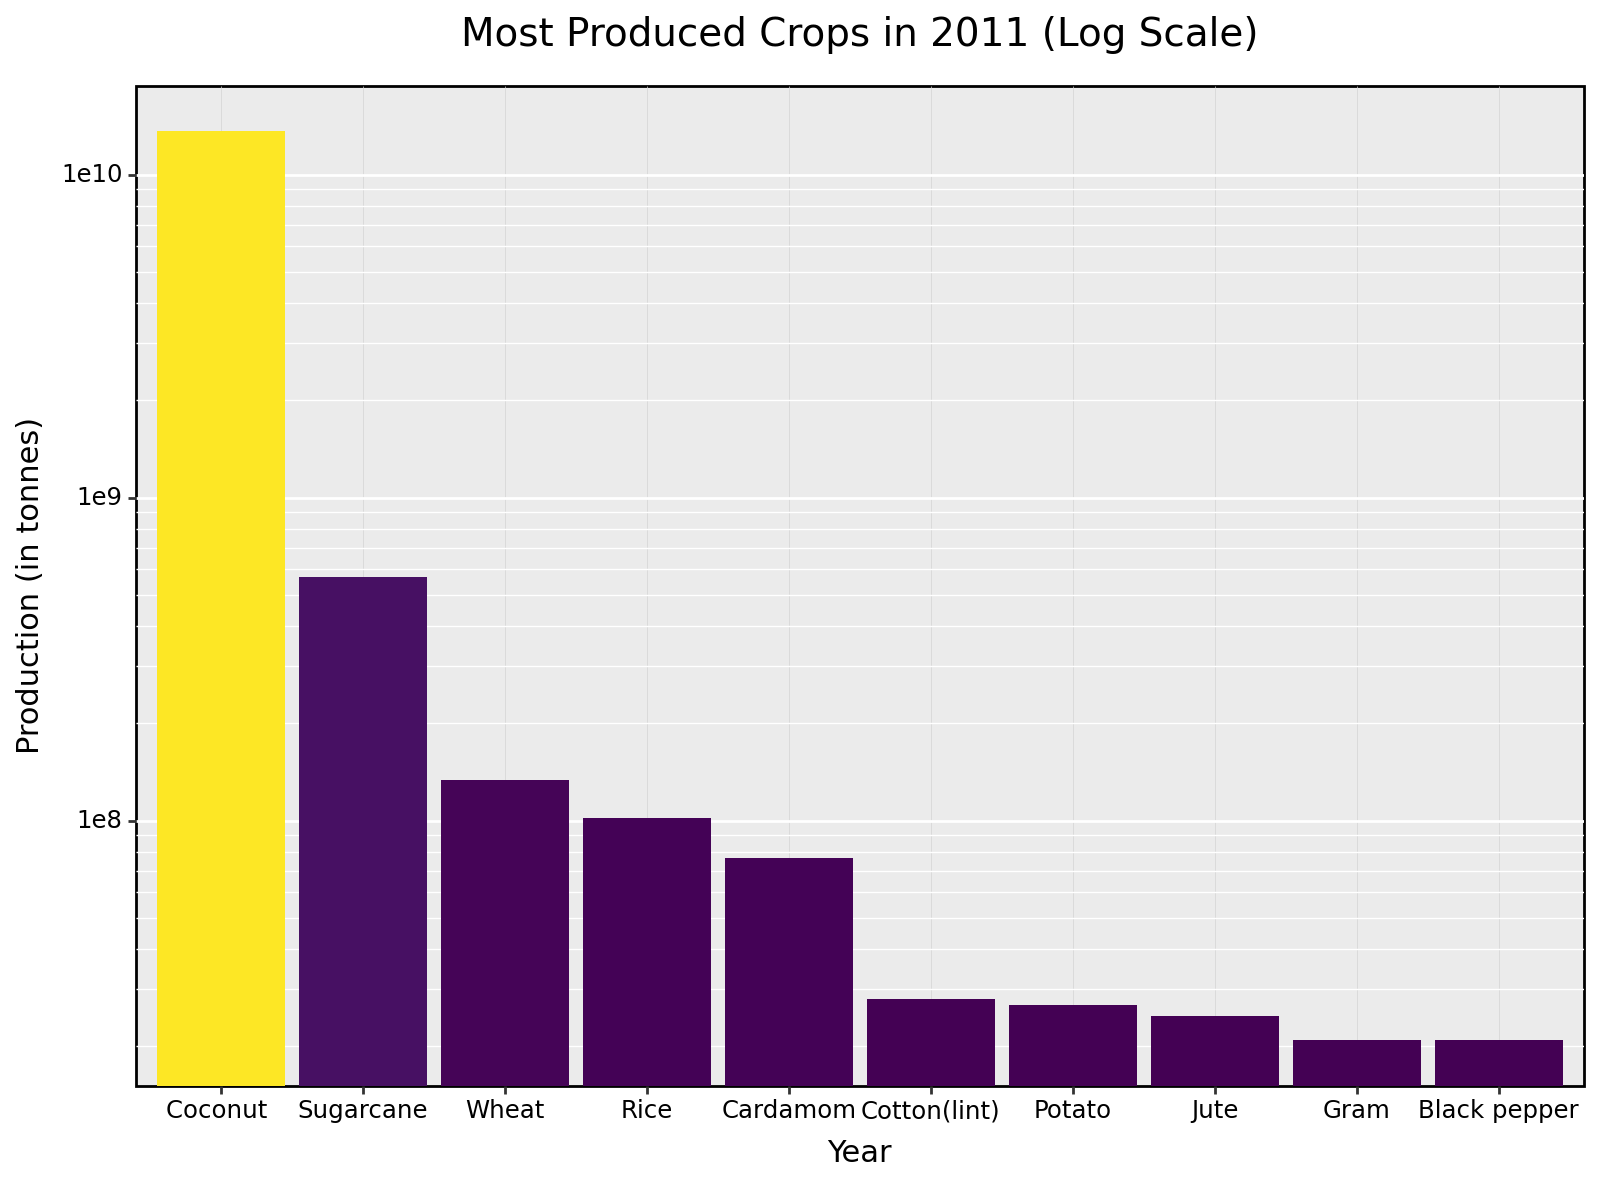

In [258]:
print(
    ggplot(top_crops.head(10))
    + aes(x='factor(Crop)', y='Production')
    + geom_bar(aes(fill='Production'), stat='identity')
    + labs(title='Most Produced Crops in 2011 (Log Scale)', x='Year', y='Production (in tonnes)')
    + theme(axis_text_x=element_text(angle=0, hjust=0.5, color='black'),
            axis_text_y=element_text(color='black'),
            panel_grid_major_x=element_line(color="lightgray", size=0.25),
            panel_border=element_rect(color="black", size=1),
            legend_position='none',
            plot_title=element_text(hjust=0.5, size=14, color='black'),
            figure_size=(8, 6))
    + scale_x_discrete(limits=top_crops['Crop'].head(10).tolist())
    + scale_y_log10()
)

# Seasonal Trends

In [259]:
season_prod = crop_production.groupby(['Season'])['Production'].sum().reset_index()
season_prod = season_prod.sort_values(by='Production', ascending=False).reset_index(drop=True)
season_prod

,Season,Production
0,Whole Year,8.811157e+10
1,Kharif,3.232609e+09
2,Rabi,1.382075e+09
3,Winter,2.488497e+08
4,Summer,1.175802e+08
5,Autumn,3.642556e+07


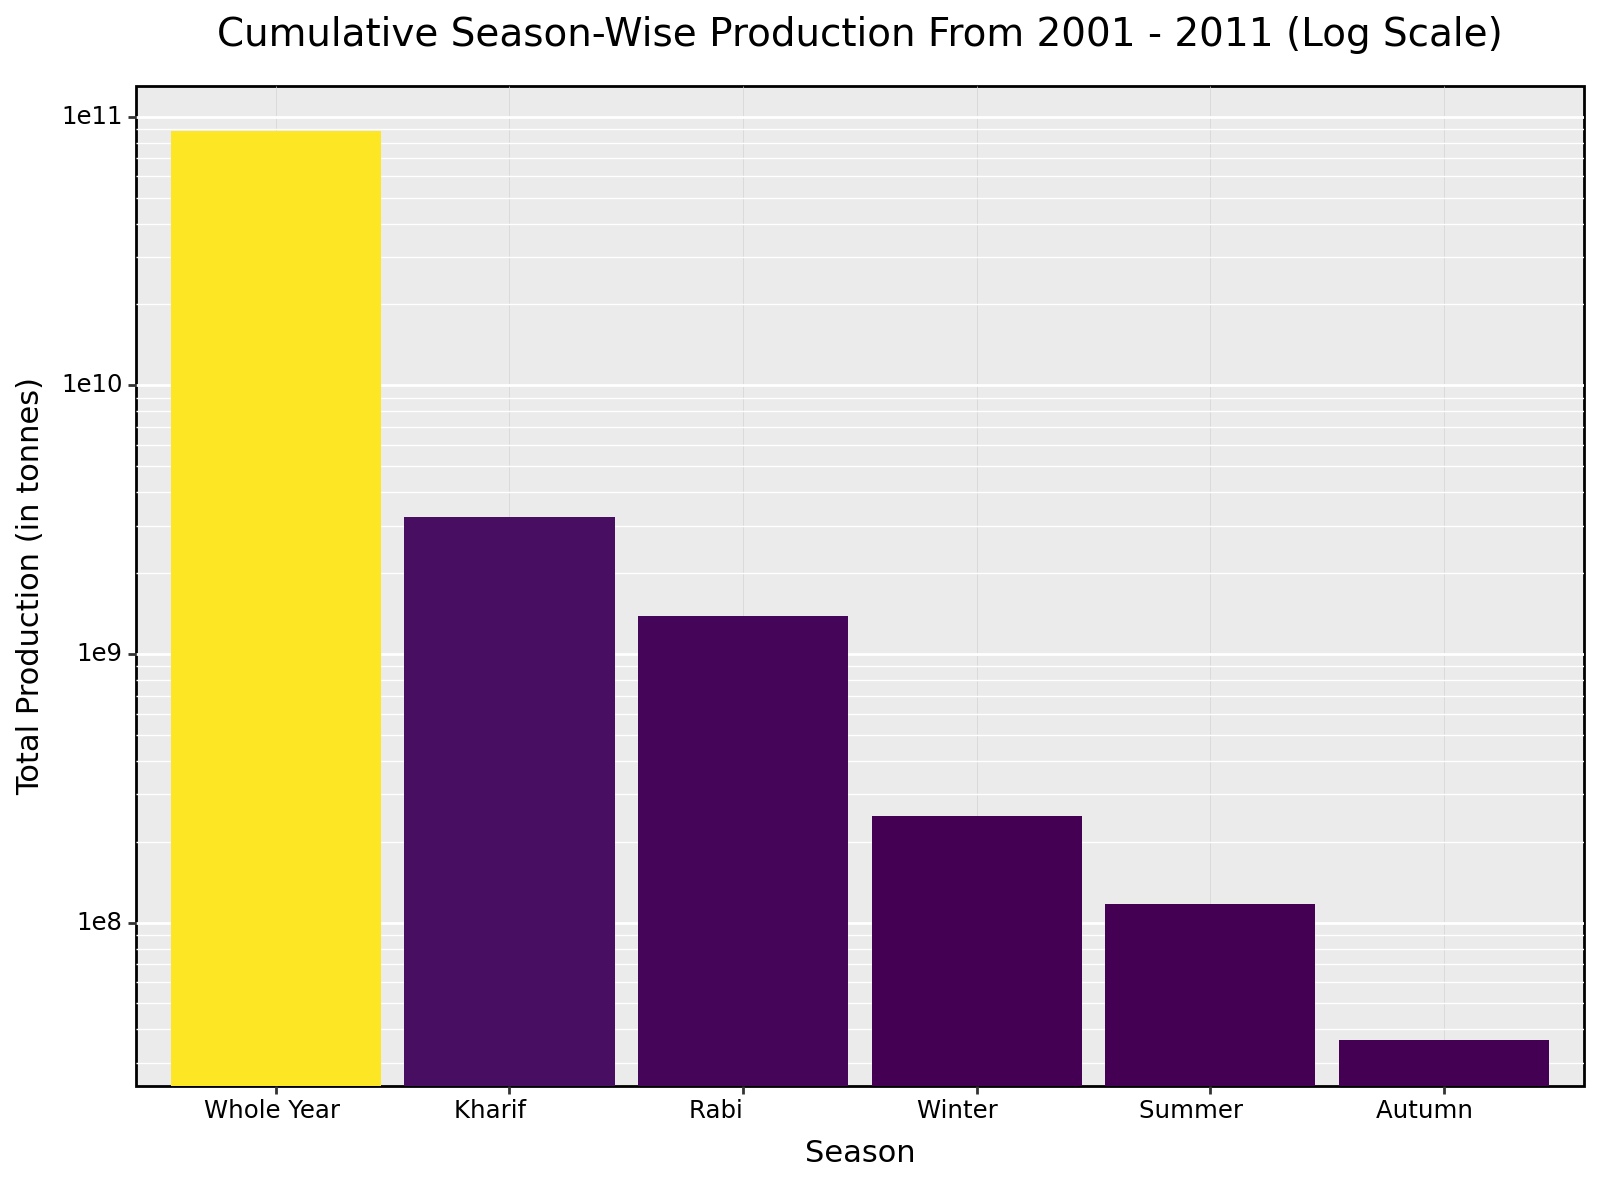

In [260]:
print(
    ggplot(season_prod)
    + aes(x='factor(Season)', y='Production')
    + geom_bar(aes(fill='Production'), stat='identity')
    + labs(title='Cumulative Season-Wise Production From 2001 - 2011 (Log Scale)', x='Season', y='Total Production (in tonnes)')
    + theme(axis_text_x=element_text(angle=0, hjust=0.5, color='black'),
            axis_text_y=element_text(color='black'),
            panel_grid_major_x=element_line(color="lightgray", size=0.25),
            panel_border=element_rect(color="black", size=1),
            legend_position='none',
            plot_title=element_text(hjust=0.5, size=14, color='black'),
            figure_size=(8, 6))
    + scale_x_discrete(limits=season_prod['Season'].head(10).tolist())
    + scale_y_log10()
)

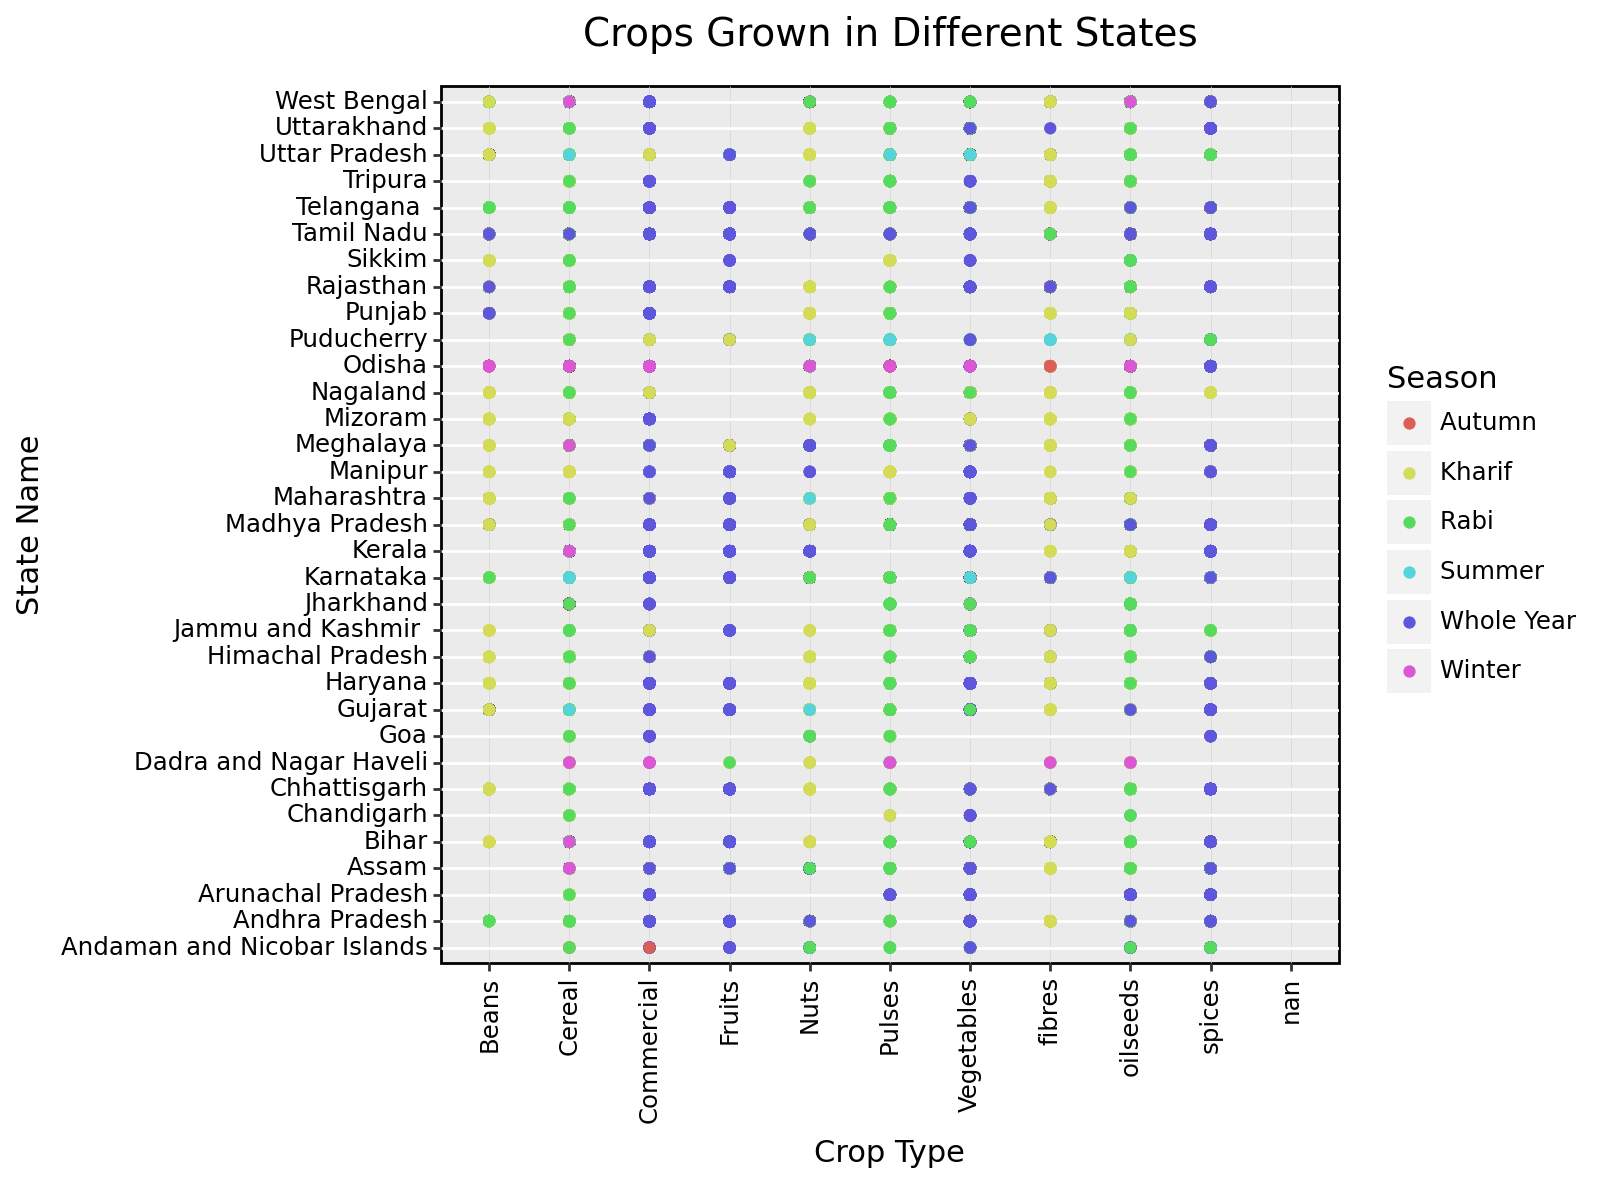

In [261]:
print(
    ggplot(crop_production)
    + aes(x='cat_crop', y='State_Name', color='Season')
    + geom_point()
    + labs(title='Crops Grown in Different States', x='Crop Type', y='State Name', color='Season')
    + theme(axis_text_x=element_text(angle=90, hjust=0.5, color='black'),
            axis_text_y=element_text(color='black'),
            panel_grid_major_x=element_line(color="lightgray", size=0.25),
            panel_border=element_rect(color="black", size=1),
            legend_position='right',
            plot_title=element_text(hjust=0.5, size=14, color='black'),
            figure_size=(8, 6))
)